# 1. Loading dataset

In [32]:
# Import libraries
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
import joblib

In [31]:
data = pd.read_excel('../data/heart_disease.xlsx')


# 2. Exploratory data analysis

In [ ]:
# Basic info about data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [33]:
# Check how many records are null
null_counts = pd.DataFrame(data[data.select_dtypes('number').columns].isna().sum(), columns=['Null Counts'])
null_counts

,Null Counts
BMI,0
PhysicalHealth,0
MentalHealth,0
SleepTime,0


In [34]:
# First five rows of data
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [35]:
data.describe().applymap(lambda x: f"{x:0.1f}")

/var/folders/ng/n80mjpcx2tl32pbkmmz7gcf00000gn/T/ipykernel_67053/1601573229.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data.describe().applymap(lambda x: f"{x:0.1f}")


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.0,319795.0,319795.0,319795.0
mean,28.3,3.4,3.9,7.1
std,6.4,8.0,8.0,1.4
min,12.0,0.0,0.0,1.0
25%,24.0,0.0,0.0,6.0
50%,27.3,0.0,0.0,7.0
75%,31.4,2.0,3.0,8.0
max,94.8,30.0,30.0,24.0


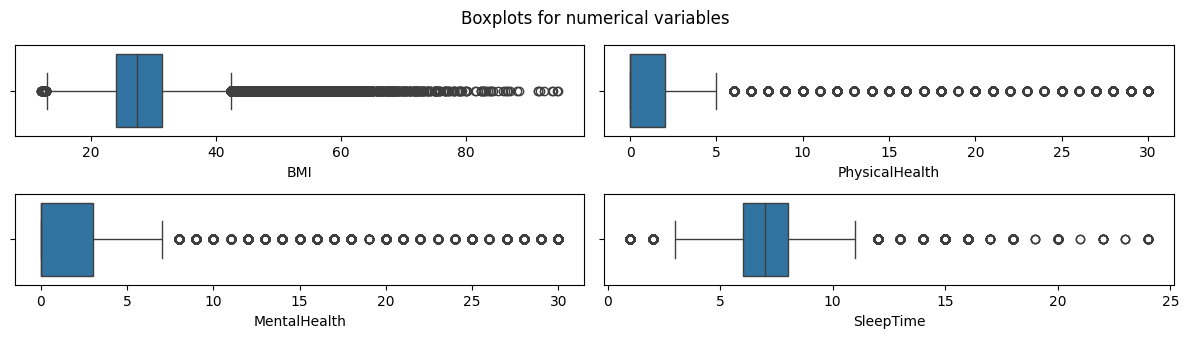

In [38]:
numeric_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize=(12, 6))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), len(numeric_cols)//2, i)
    sns.boxplot(x=data[column])

plt.suptitle('Boxplots for numerical variables')
plt.tight_layout()
plt.show()

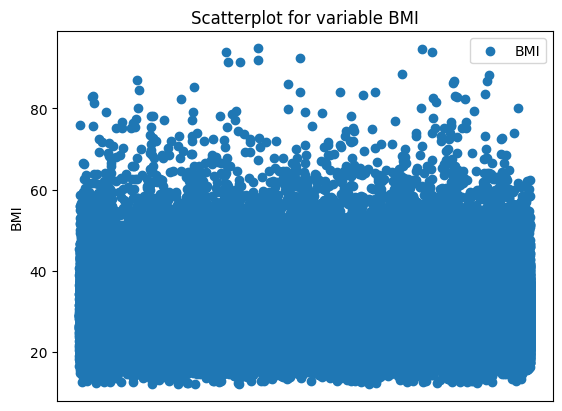

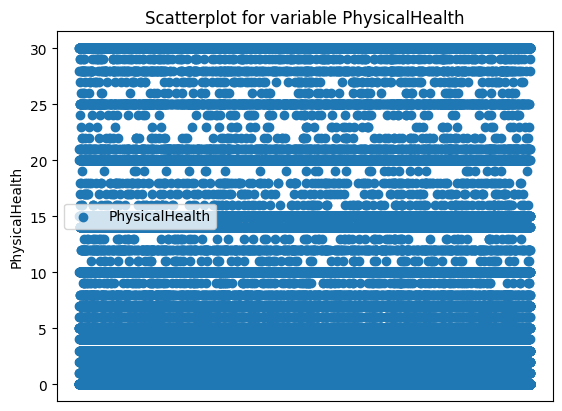

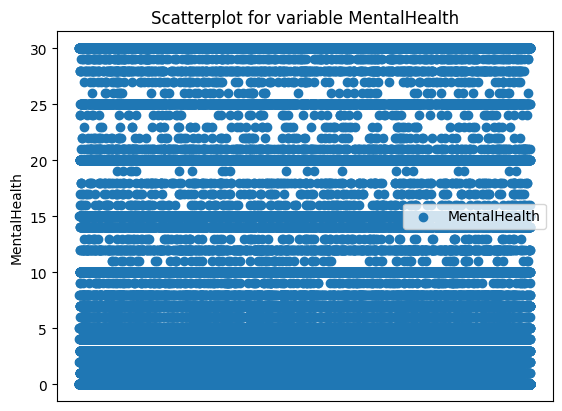

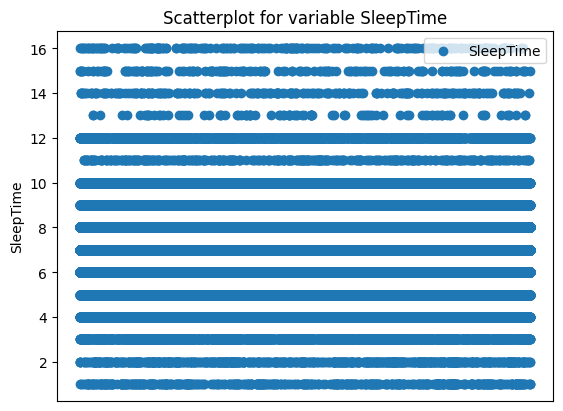

In [43]:
# Scatterplots for each one of the numerical variables
for var in ('BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'):
  plt.scatter(data.index, data[var], label=var)
  # Adjust labels
  plt.xticks([])
  plt.ylabel(var)
  # Add title
  plt.title(f'Scatterplot for variable {var}')
  # Add legend
  plt.legend()
  plt.show()

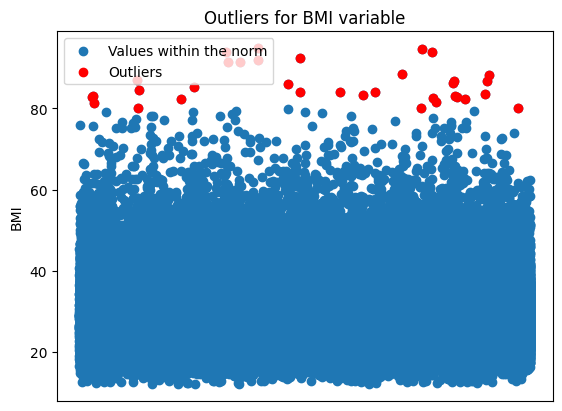

In [36]:
# Scatterplot including info about outliers for the variable 'BMI'
plt.clf()
plt.scatter(data.index, data['BMI'], label='Values within the norm')
plt.scatter(data[data['BMI'] > 80].index, data[data['BMI'] > 80]['BMI'], color='red', label='Outliers')
# Adjust labels
plt.xticks([])
plt.ylabel('BMI')
# Add title
plt.title('Outliers for BMI variable')
# Add legend
plt.legend()
plt.show()

In [44]:
# Replace all the outliers for vatiable 'BMI' with median

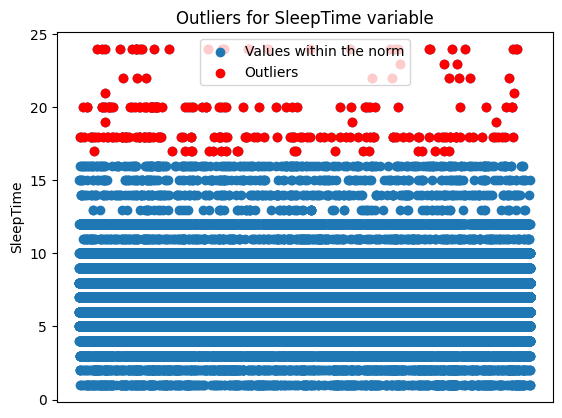

In [37]:
# Scatterplot including info about outliers for the variable 'SleepTime'
plt.clf()
plt.scatter(data.index, data['SleepTime'], label='Values within the norm')
plt.scatter(data[data['SleepTime'] > 16].index, data[data['SleepTime'] > 16]['SleepTime'], color='red', label='Outliers')
# Adjust labels
plt.xticks([])
plt.ylabel('SleepTime')
# Add title
plt.title('Outliers for SleepTime variable')
# Add legend
plt.legend()
plt.show()

In [42]:
# Remove all records where sleep time is equal to 24 hours - it must be a measurement error
data = data[data['SleepTime'] != 24]

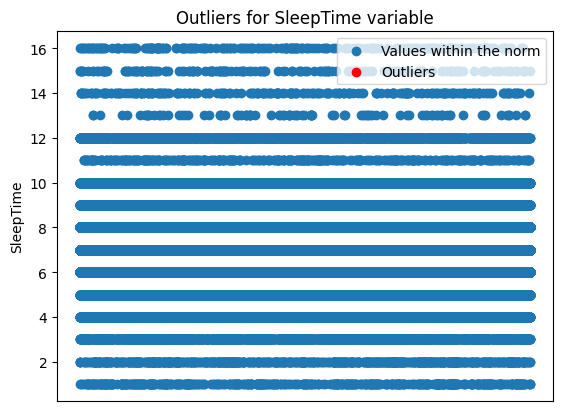

In [41]:
# Scatterplot for the variable 'SleepTime' after modification

plt.clf()
plt.scatter(data.index, data['SleepTime'], label='Values within the norm')
plt.scatter(data[data['SleepTime'] > 16].index, data[data['SleepTime'] > 16]['SleepTime'], color='red', label='Outliers')
# Adjust labels
plt.xticks([])
plt.ylabel('SleepTime')
# Add title
plt.title('Outliers for SleepTime variable')
# Add legend
plt.legend()
plt.show()

In [39]:
# Replace all the outliers for variable 'SleepTime' with median
median_sleep_time = data['SleepTime'].median()

# Replace outliers (SleepTime > 16) with the median value
data.loc[data['SleepTime'] > 16, 'SleepTime'] = median_sleep_time

Text(0.5, 1.0, 'Correlation matrix')

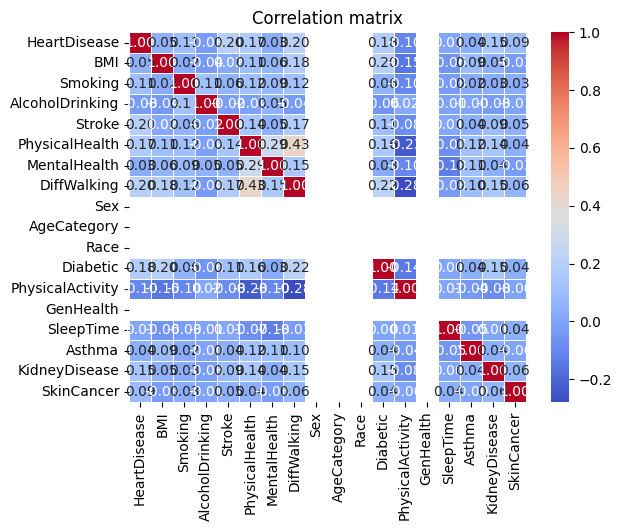

In [70]:
numeric_cols = data.select_dtypes('number').columns
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation matrix')

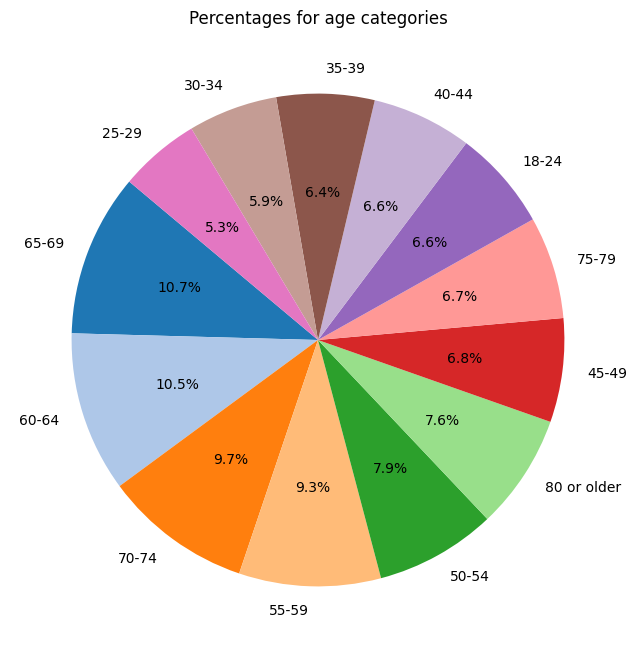

In [40]:
age_category_counts = data['AgeCategory'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Percentages for age categories')
plt.show()

# 3. Adjust categorical variables


In [46]:
# Encode categorical columns
def adjust_categorical_variable(var: str):
    if var == 'Yes':
        return 1
    else:
        return 0

categorical_columns = data.dtypes == object
categorical_columns = list(categorical_columns[categorical_columns].index)
print(categorical_columns)

['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [47]:
# Apply adjust_categorical_variable() function where needed
data[categorical_columns] = data[categorical_columns].applymap(adjust_categorical_variable)

/var/folders/ng/n80mjpcx2tl32pbkmmz7gcf00000gn/T/ipykernel_67053/102934760.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[categorical_columns] = data[categorical_columns].applymap(adjust_categorical_variable)


In [48]:
print(data.head())

   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0               3   
1             0  20.34        0                0       1               0   
2             0  26.58        1                0       0              20   
3             0  24.21        0                0       0               0   
4             0  23.71        0                0       0              28   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0            30            0    0            0     0         1   
1             0            0    0            0     0         0   
2            30            0    0            0     0         1   
3             0            0    0            0     0         0   
4             0            1    0            0     0         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          0          5       1              0   

In [49]:
# Encoding

# encoder = OneHotEncoder(sparse_output=False)

# encoded_cols = pd.DataFrame(encoder.fit_transform(training_incomes[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
# training_incomes = pd.concat([training_incomes.drop(columns=categorical_cols), encoded_cols], axis=1)

# 4. Feature engineering

In [50]:
X = data.drop('HeartDisease', axis=1)  # 'HeartDisease' is the target column
y = data['HeartDisease']

In [51]:
print(X.head())

     BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0  16.60        1                0       0               3            30   
1  20.34        0                0       1               0             0   
2  26.58        1                0       0              20            30   
3  24.21        0                0       0               0             0   
4  23.71        0                0       0              28             0   

   DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  \
0            0    0            0     0         1                 1          0   
1            0    0            0     0         0                 1          0   
2            0    0            0     0         1                 1          0   
3            0    0            0     0         0                 0          0   
4            1    0            0     0         0                 1          0   

   SleepTime  Asthma  KidneyDisease  SkinCancer  
0     

In [52]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64


# 5. Modelling

In [53]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print(y_train.head())

95877     0
228939    1
260256    0
84785     0
83845     1
Name: HeartDisease, dtype: int64


In [55]:
# Create and train the Random Forest Classifier
model_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
# Create and train model based on logistic regression
model_log_reg = LogisticRegression(random_state=42, C=100)
model_log_reg.fit(X_train, y_train)

/opt/anaconda3/envs/suml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, random_state=42)

In [57]:
# Create and train model based on SGD classifier
model_sgd_clf = SGDClassifier(alpha=0.01, random_state=42)
model_sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, random_state=42)

In [58]:
# Make predictions on test test
y_pred_rfc = model_rfc.predict(X_test)
y_pred_log = model_log_reg.predict(X_test)
y_pred_sgd = model_sgd_clf.predict(X_test)

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_log = confusion_matrix(y_test, y_pred_log)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)

# 6. Analyses of results

In [61]:
# Auxiliary functions

def print_roc_curve(classifier, name):
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=">50K")
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'ROC curve [{name}] (area = %0.2f)' % roc_auc)
    # roc curve for tpr = fpr
    plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()



def print_f1_recall_accuracy(classifier, name):
    y_pred = classifier.predict(X_test)
    print(name)
    print("Accuracy: ", precision_score(y_test, y_pred, pos_label="<=50K"))
    print("Recall: ", recall_score(y_test, y_pred, average="binary", pos_label="<=50K"))
    print("F1 Score: ", f1_score(y_test, y_pred, pos_label="<=50K"))
    print()

In [62]:
# Evaluate the performance of different models

# Random Forest Classifier
print("Precision:", accuracy_score(y_test, y_pred_rfc))

# Analyze feature importance
importances = model_rfc.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names)
feature_importances.sort_values(ascending=False, inplace=True)
print("Feature Importances:\n", feature_importances)

Precision: 0.8940571303491299
Feature Importances:
 BMI                 0.562917
SleepTime           0.103791
PhysicalHealth      0.087089
MentalHealth        0.076648
Stroke              0.032802
DiffWalking         0.030803
Diabetic            0.028571
KidneyDisease       0.016545
Asthma              0.014326
Smoking             0.014183
PhysicalActivity    0.013528
SkinCancer          0.012553
AlcoholDrinking     0.006244
GenHealth           0.000000
Race                0.000000
Sex                 0.000000
AgeCategory         0.000000
dtype: float64


<Axes: >

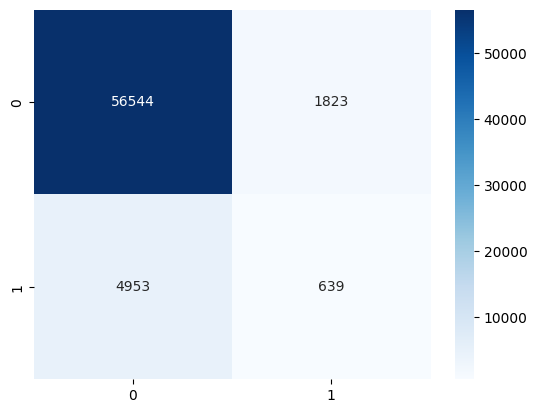

In [63]:
# Heatmap of confusion matrix for model based on random forest classifier
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])

In [64]:
# Logistic regression
print("Precision:", accuracy_score(y_test, y_pred_log))

Precision: 0.9131787551400116


<Axes: >

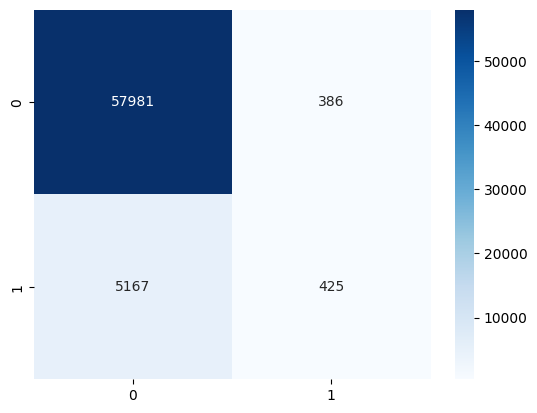

In [65]:
# Heatmap of confusion matrix for model based on logistic regression
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])

In [66]:
# SGD classifier
print("Precision:", accuracy_score(y_test, y_pred_sgd))

Precision: 0.9125689895089042


<Axes: >

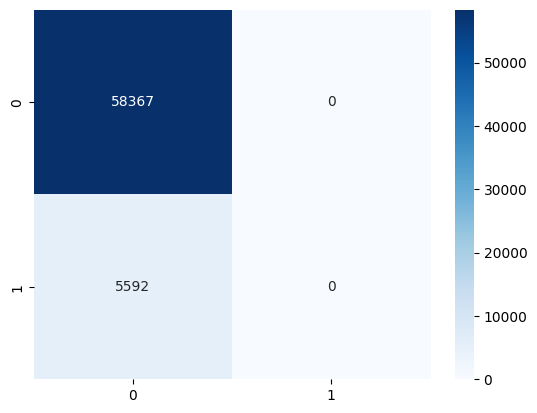

In [67]:
# Heatmap of confusion matrix for model based on SGD classifier
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])

In [68]:
# 7. Exporting model

In [71]:
joblib.dump(model_rfc, 'model_rfc.joblib')

['model_rfc.joblib']